In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [2]:
def deseasonalise(series, freq=3):

    mulresult = seasonal_decompose(series, model='multiplicative', freq=freq)
    addresult = seasonal_decompose(series, model='additive', freq=freq)
    
    acfmul = acf(mulresult.resid.dropna())
    acfadd = acf(addresult.resid.dropna())

    sumacfmul = sum(acfmul**2)
    sumacfadd = sum(acfadd**2)

    seasonality = ''
    deseasonalised = None
    
    if(sumacfmul<=sumacfadd):
        seasonality = 'multiplicative'
        deseasonalised = mulresult.observed / mulresult.seasonal
    else:
        seasonality = 'additive'
        deseasonalised = addresult.observed - addresult.seasonal
    
    return {
        'seasonality' : seasonality,
        'deseasonalised' : deseasonalised
    }

# Approach

#### For the effective comparison of raw and deseasonlised modal prices with the MSP of the commodities, following steps were performed:
1. The common commodities in both the datasets were found. The comparisons were done in two ways.
> In the first method the price values were aggregated across all APMCs for each commodity, to get the overview of specific commodity statistic in entire market. In the second method, individual processing and comparison were done for each common commodity under each APMC.
2. For each commodity the datasets were combined
> For each commodity, the price values were aggregated from monthly dataset. Since the timestamp range of monthly dataset and MSP dataset differed, the timestamp range for each commodity were increased and forward filled, in order to facilitate the easy merging of the subsampled datasets. The new dataset now contains price values (minimum, maximum and modal), quantities and the msps for a commodity.
3. The modal prices were deseasonalised and comparison plots were drawn.
> The modal prices of the new dataset obtained were deseasonalised using the method used previously. The line plots comparing the modal price, deseasonalised price and the minimum support price were plotted and save in respective folders.

In [3]:
# Loading the monthly dataset
df1 = pd.read_csv('./data/Monthly_data_cmo_cleaned.csv', parse_dates=['date'])
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head()

,APMC,Commodity,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name
0,AMARAWATI,AMBA KOY,435,3250.0,4250.0,3750.0,2016-06-01,AMARAVATHI
1,PUNE-MANJRI,AMBAT CHUKA,12,180.0,1440.0,270.0,2014-12-01,PUNE
2,PUNE-MANJRI,AMBAT CHUKA,4,180.0,1350.0,270.0,2015-01-01,PUNE
3,PUNE-MANJRI,AMBAT CHUKA,10,180.0,1221.0,270.0,2015-02-01,PUNE
4,PUNE-MANJRI,AMBAT CHUKA,11,180.0,1300.0,270.0,2015-03-01,PUNE


In [4]:
# Loading the MSP dataset
df2 = pd.read_csv('./data/CMO_MSP_mandi_cleaned.csv', parse_dates=['year'])
df2.drop(['Unnamed: 0', 'msp_filter'], axis=1, inplace=True)
df2.head()

,commodity,year,Type,msprice
0,BAJRI,2012-01-01,KHARIF CROPS,1175.0
1,BAJRI,2013-01-01,KHARIF CROPS,1310.0
2,BAJRI,2014-01-01,KHARIF CROPS,1250.0
3,BAJRI,2015-01-01,KHARIF CROPS,1275.0
4,BAJRI,2016-01-01,KHARIF CROPS,1330.0


In [5]:
# Finding the commond commodities in both datasets
common_commodities = list(set(df1.Commodity.unique())&set(df2.commodity.unique()))
common_commodities.sort()
common_commodities

['BAJRI',
 'COCONUT',
 'COTTON',
 'GR.NUT KERNELS',
 'MAIZE',
 'MUSTARD',
 'NIGER-SEED',
 'PADDY-UNHUSKED',
 'PIGEON PEA (TUR)',
 'RICE(PADDY-HUS)',
 'SAFFLOWER',
 'SESAMUM',
 'SORGUM(JAWAR)',
 'SPLIT BLACK GRAM',
 'SPLIT GREEN GRAM',
 'SUGARCANE',
 'SUNFLOWER',
 'WHEAT(HUSKED)',
 'WHEAT(UNHUSKED)']

In [6]:
### Combining the datasets for single commodity 'bajri'

In [7]:
comdf1 = df1.loc[df1.Commodity=='BAJRI'].groupby('date').mean()
comdf1

,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,
2014-09-01,495.324324,1337.864865,1563.351351,1465.216216
2014-10-01,1022.680851,1325.936170,1592.000000,1461.872340
2014-11-01,1199.629032,1340.177419,1573.241935,1465.790323
2014-12-01,785.222222,1311.244444,1546.622222,1440.533333
2015-01-01,471.462963,1336.111111,1562.148148,1453.944444
2015-02-01,510.291667,1328.291667,1540.041667,1443.875000
2015-03-01,221.400000,1327.760000,1539.760000,1437.720000
2015-04-01,309.730769,1331.384615,1548.923077,1442.000000
2015-05-01,395.777778,1340.777778,1565.611111,1450.944444


In [8]:
# Manipulating the timeseries range for easy merging of dataset.
comdf2 = df2.loc[df2.commodity=='BAJRI'].groupby('year').mean()
comdf2 = comdf2.append(pd.DataFrame(data={'msprice': np.nan}, index=[pd.Timestamp('2017-01-01')]))
comdf2 = comdf2.resample('MS').mean().ffill()
comdf2

,msprice
2012-01-01,1175.0
2012-02-01,1175.0
2012-03-01,1175.0
2012-04-01,1175.0
2012-05-01,1175.0
2012-06-01,1175.0
2012-07-01,1175.0
2012-08-01,1175.0
2012-09-01,1175.0
2012-10-01,1175.0


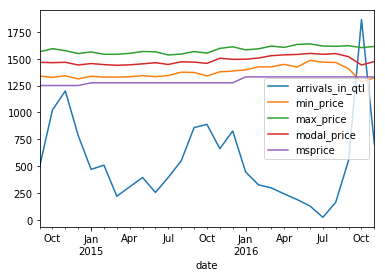

In [9]:
# Merging of datasets for commodity 'bajri'
comdf = pd.DataFrame(comdf1)
comdf['msprice'] = comdf2.loc[comdf1.index]
comdf = comdf.ffill()
comdf.plot()

Seasonality detected: additive


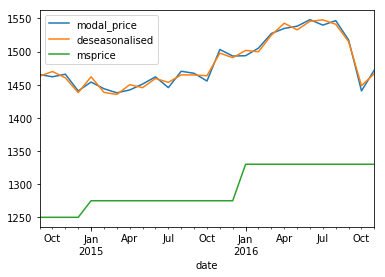

In [10]:
# Deseasonalising the modal price and comparing with MSP
desdata = deseasonalise(comdf.modal_price, 3)
print('Seasonality detected:', desdata['seasonality'])
comdf['deseasonalised'] = desdata['deseasonalised']
comdf[['modal_price', 'deseasonalised', 'msprice']].plot()

### For each of the common commodity, aggregating the modals prices across all APMCs, deseasonalising them and plotting wih the MSP

In [11]:
print('Commodities rejected due to less data:')
for commodity in common_commodities:
    comdf1 = df1.loc[df1.Commodity==commodity].groupby('date').mean()
    comdf2 = df2.loc[df2.commodity==commodity].groupby('year').mean().resample('MS').mean().ffill()
    comdf = pd.DataFrame(comdf1)
    comdf['msprice'] = comdf2.loc[comdf1.index]
    comdf = comdf.ffill()
    if (comdf.shape[0]<6):
        print(commodity)
    else:
        desdata = deseasonalise(comdf.modal_price, 3)
        title = 'Commodity: {}\nSeasonality detected: {}'.format(commodity, desdata['seasonality'])
        comdf['deseasonalised'] = desdata['deseasonalised']
        fig = comdf[['modal_price', 'deseasonalised', 'msprice']].plot()
        plt.suptitle(title)
        plt.savefig('./visuals/msp-comparison/commodity/{}.png'.format(commodity))
        plt.clf()

Commodities rejected due to less data:


/Users/saumay/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


NIGER-SEED


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

### Comparing the raw and deseasonalised price with MSP for each commodity in each APMC (according to available data)

In [12]:
for apmc in df1.APMC.unique():
    apmcdf = df1.loc[df1.APMC==apmc]
    for commodity in common_commodities:
        comdf1 = apmcdf.loc[apmcdf.Commodity==commodity].groupby('date').mean()
        if comdf1.shape[0]==0:
            break
        comdf2 = df2.loc[df2.commodity==commodity].groupby('year').mean()
        comdf2 = comdf2.append(pd.DataFrame(data={'msprice': np.nan}, index=[pd.Timestamp('2017-01-01')]))
        comdf2 = comdf2.resample('MS').mean().ffill()
        comdf = pd.DataFrame(comdf1)
        comdf['msprice'] = comdf2.loc[comdf1.index]
        comdf = comdf.ffill()
        if (comdf.shape[0]<6):
            print('APMC: {}, Commodity: {}'.format(apmc, commodity))
        else:
            desdata = deseasonalise(comdf.modal_price, 3)
            title = 'APMC: {}  Commodity: {}\nSeasonality detected: {}'.format(apmc, commodity, desdata['seasonality'])
            comdf['deseasonalised'] = desdata['deseasonalised']
            fig = comdf[['modal_price', 'deseasonalised', 'msprice']].plot()
            plt.suptitle(title)
            plt.savefig('./visuals/msp-comparison/apmc-commodity/{} | {}.png'.format(apmc, commodity))
            plt.clf()

APMC: AURANGABAD, Commodity: BAJRI
APMC: KALYAN, Commodity: BAJRI
APMC: ATPADI, Commodity: BAJRI
APMC: BHOKAR, Commodity: BAJRI
APMC: KILLE DHARUR, Commodity: BAJRI


/Users/saumay/miniconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


APMC: AUSA, Commodity: BAJRI
APMC: GHANSAWANGI, Commodity: BAJRI
APMC: VASAI, Commodity: BAJRI
APMC: JINTUR, Commodity: BAJRI
APMC: JINTUR-BORI, Commodity: BAJRI
APMC: KARANJA, Commodity: BAJRI
APMC: KARMALA, Commodity: BAJRI
APMC: ACHALPUR, Commodity: BAJRI
APMC: KOLHAPUR-LAXMIPURI, Commodity: BAJRI
APMC: KURDWADI-MODNIMB, Commodity: BAJRI
APMC: WASHIM, Commodity: BAJRI
APMC: AKOLA, Commodity: BAJRI
APMC: PANDHARPUR, Commodity: BAJRI
APMC: ASHTI (JALNA), Commodity: BAJRI
APMC: SHRIRAMPUR-BELAPUR, Commodity: BAJRI
APMC: BALAPUR, Commodity: BAJRI
APMC: LONAR, Commodity: BAJRI
APMC: MANWAT, Commodity: BAJRI
APMC: LOHARA, Commodity: BAJRI
APMC: MUKHED, Commodity: BAJRI
APMC: SHRIGONDA, Commodity: BAJRI
APMC: KADA (ASHTI), Commodity: BAJRI
APMC: NAVAPUR, Commodity: BAJRI
APMC: NAMPUR, Commodity: BAJRI
APMC: BHUSAVAL, Commodity: BAJRI
APMC: CHIKHALI, Commodity: BAJRI
APMC: BHOKARDAN-PIMPALGAON RENU, Commodity: BAJRI
APMC: DHARANGAON, Commodity: BAJRI
APMC: RAHURI-SONGAON, Commodity: BAJRI
A

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>